# Leveraging Student Information to Enhance College Persistence

## Part 4: Comparison of Model Validation Results
- Logistic Regression 
- Random Forest
- Gradient Boosting

### Step 1: Read the Data

In [22]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [23]:
#Read the datasets for Observed Dropout Rate by Predicted Dropout Rate

#Logistic Regression
dfDecileStats_LogisticRegression_Train = pd.read_csv('data/DecileStats_LogisticRegressionOptimized_Train.csv')
dfDecileStats_LogisticRegression_Test = pd.read_csv('data/DecileStats_LogisticRegressionOptimized_Test.csv')

#Random Forest
dfDecileStats_RandomForest_Train = pd.read_csv('data/DecileStats_RandomForest_Train.csv')
dfDecileStats_RandomForest_Test = pd.read_csv('data/DecileStats_RandomForest_Test.csv')

#Gradient Boosting
dfDecileStats_GradientBoosting_Train = pd.read_csv('data/DecileStats_GradientBoosting_Train.csv')
dfDecileStats_GradientBoosting_Test = pd.read_csv('data/DecileStats_GradientBoosting_Test.csv')

In [24]:
#Read tpr and fpr datasets for ROC

#Logistic Regression
tpr_fpr_LogisticRegression_Train = pd.read_csv('data/fpr_tpr_LogisticRegressionOptimized_Train.csv')
tpr_fpr_LogisticRegression_Test = pd.read_csv('data/fpr_tpr_LogisticRegressionOptimized_Test.csv')

#Random Forest
tpr_fpr_RandomForest_Train = pd.read_csv('data/fpr_tpr_RandomForest_Train.csv')
tpr_fpr_RandomForest_Test = pd.read_csv('data/fpr_tpr_RandomForest_Test.csv')

#Gradient Boosting
tpr_fpr_GradientBoosting_Train = pd.read_csv('data/fpr_tpr_GradientBoosting_Train.csv')
tpr_fpr_GradientBoosting_Test = pd.read_csv('data/fpr_tpr_GradientBoosting_Test.csv')

### Step 2: Generate ROC for train/test samples

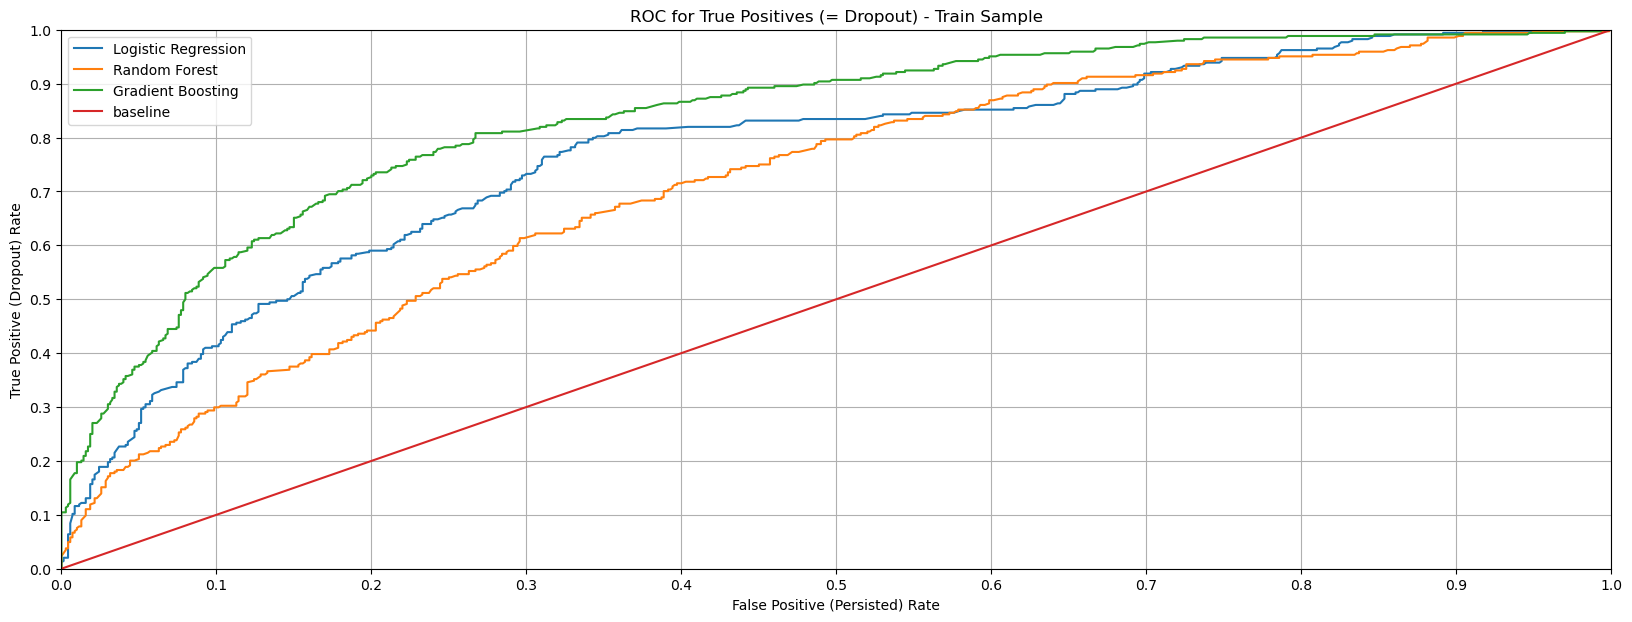

In [25]:
#Generate ROC for the train sample
fig,ax = plt.subplots(figsize = (20, 7))

plt.plot(tpr_fpr_LogisticRegression_Train['fpr'], tpr_fpr_LogisticRegression_Train['tpr'], label='Logistic Regression')
plt.plot(tpr_fpr_RandomForest_Train['fpr'], tpr_fpr_RandomForest_Train['tpr'], label='Random Forest')
plt.plot(tpr_fpr_GradientBoosting_Train['fpr'], tpr_fpr_GradientBoosting_Train['tpr'], label='Gradient Boosting')


plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.xlabel('False Positive (Persisted) Rate')
plt.ylabel('True Positive (Dropout) Rate')
plt.title('ROC for True Positives (= Dropout) - Train Sample')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.legend();

On the training data, the gradient boosting model shows stellar results with over 70% of the dropped-out students identified for the lowest scoring 20% of the persisted students.

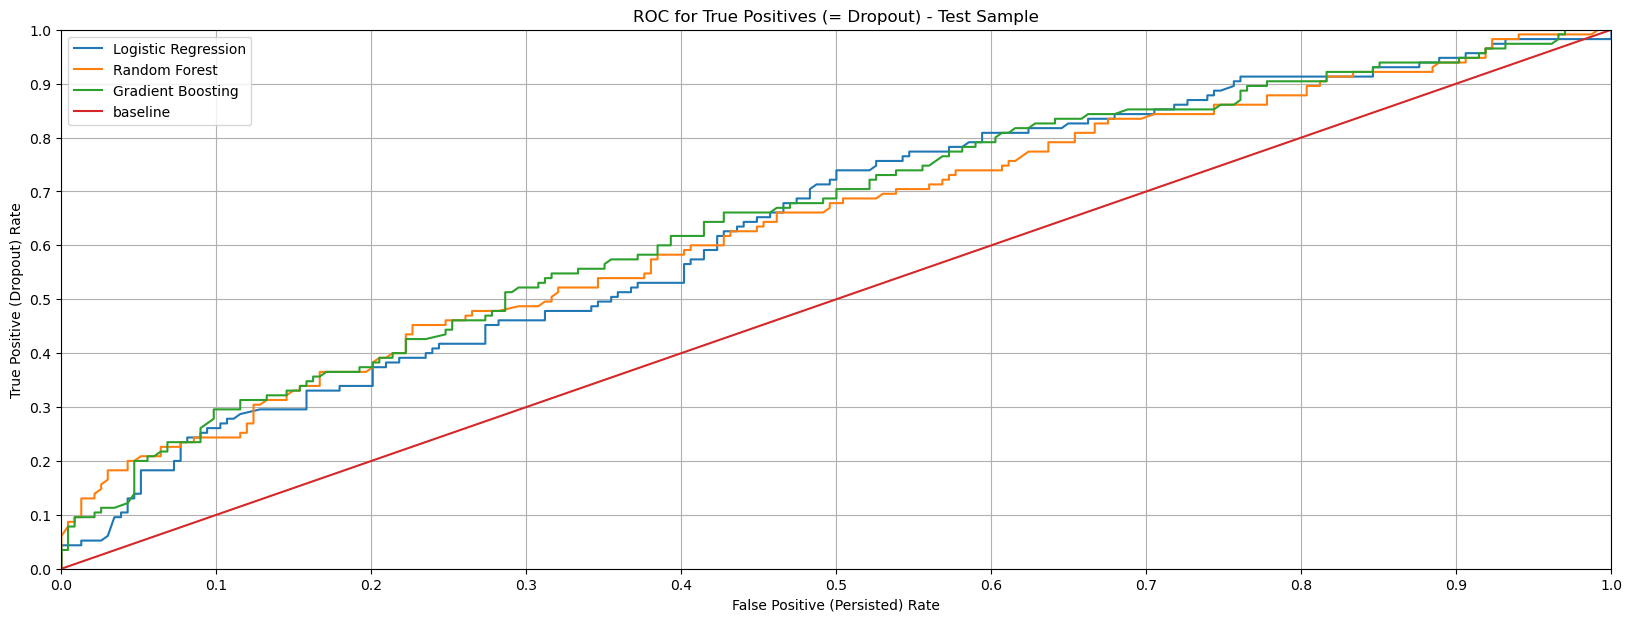

In [26]:
#Generate ROC for the test sample
fig,ax = plt.subplots(figsize = (20, 7))

plt.plot(tpr_fpr_LogisticRegression_Test['fpr'], tpr_fpr_LogisticRegression_Test['tpr'], label='Logistic Regression')
plt.plot(tpr_fpr_RandomForest_Test['fpr'], tpr_fpr_RandomForest_Test['tpr'], label='Random Forest')
plt.plot(tpr_fpr_GradientBoosting_Test['fpr'], tpr_fpr_GradientBoosting_Test['tpr'], label='Gradient Boosting')

plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.xlabel('False Positive (Persisted) Rate')
plt.ylabel('True Positive (Dropout) Rate')
plt.title('ROC for True Positives (= Dropout) - Test Sample')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.legend();

On the test sample, the results for the gradient boosting model are less pronounced, with the logistic regression model outperforming the gradient boosting model on the ROC.

### Step 3: Generate decile charts

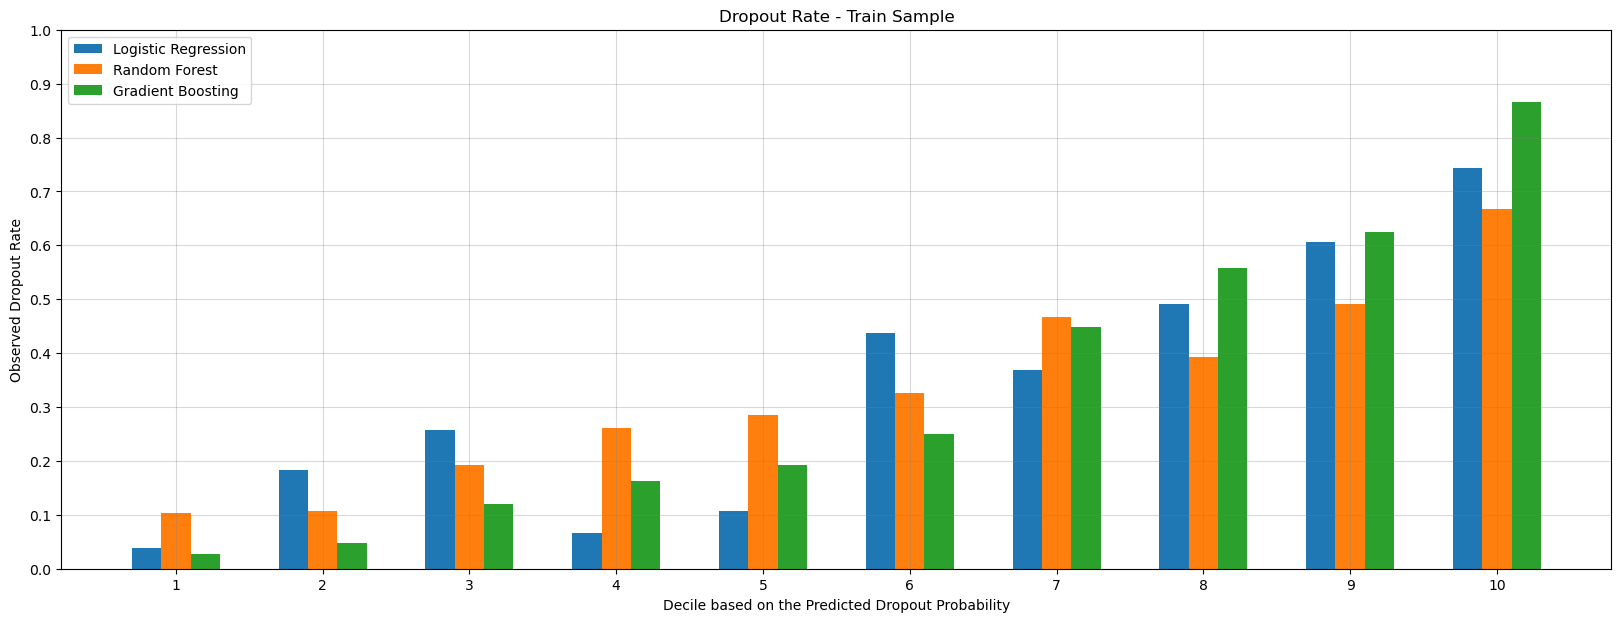

In [27]:
#Generate a decile chart to observe the rank ordering capability of the model
fig,ax = plt.subplots(figsize = (20, 7))
width = 0.2

X_label = np.arange(1,11,1)
plt.bar(X_label - width,  dfDecileStats_LogisticRegression_Train['Observed Dropout Rate'],width = width,label = 'Logistic Regression')
plt.bar(X_label,  dfDecileStats_RandomForest_Train['Observed Dropout Rate'], width = 0.2,label = 'Random Forest' )
plt.bar(X_label + width,  dfDecileStats_GradientBoosting_Train['Observed Dropout Rate'], width = width,label = 'Gradient Boosting')

plt.xlabel("Decile based on the Predicted Dropout Probability")
plt.ylabel("Observed Dropout Rate")
plt.title("Dropout Rate - Train Sample")
plt.xticks(X_label)
plt.yticks(np.linspace(0,1,11))
plt.legend()

ax.yaxis.grid(color='gray', alpha=0.3)
ax.xaxis.grid(color='gray', alpha=0.3)

plt.show();

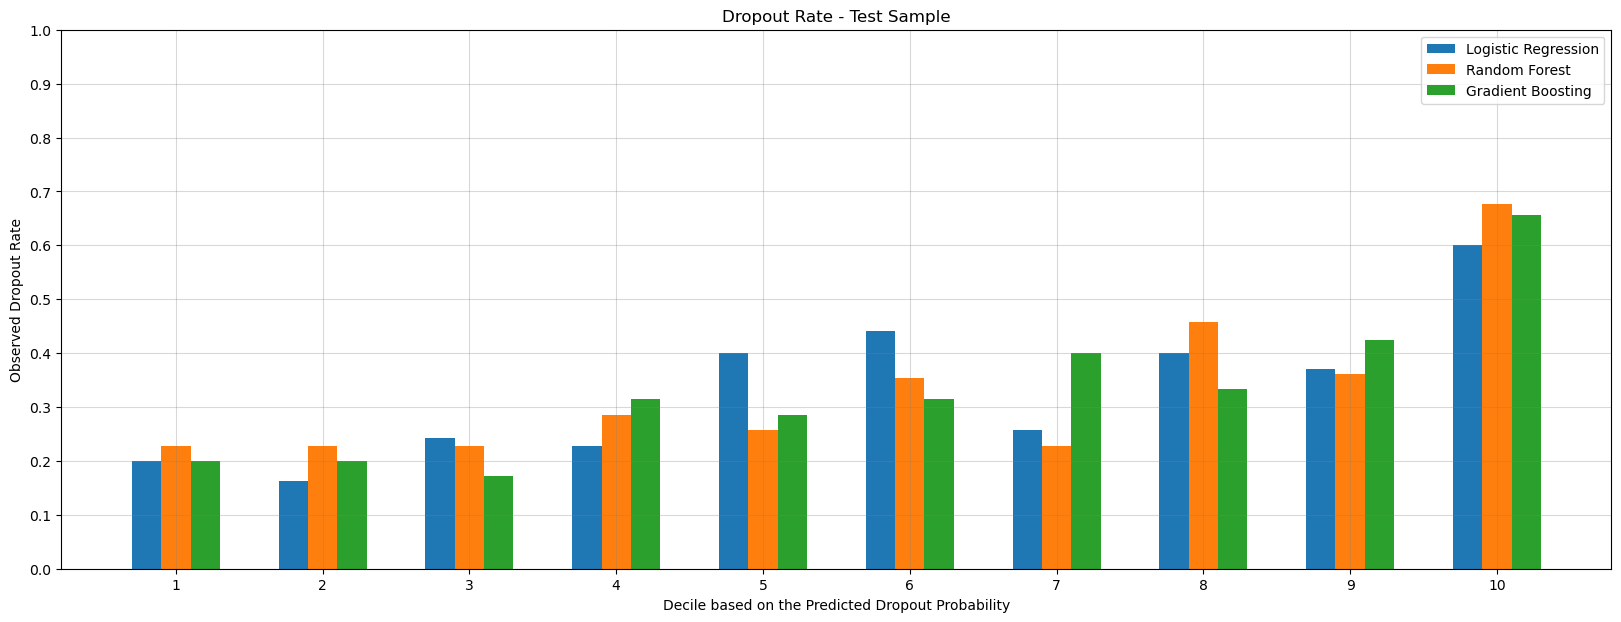

In [28]:
#Generate a chart to observe the rank ordering capability of the model
fig,ax = plt.subplots(figsize = (20, 7))
width = 0.2

X_label = np.arange(1,11,1)
plt.bar(X_label - width,  dfDecileStats_LogisticRegression_Test['Observed Dropout Rate'],width = width,label = 'Logistic Regression')
plt.bar(X_label,  dfDecileStats_RandomForest_Test['Observed Dropout Rate'], width = 0.2,label = 'Random Forest' )
plt.bar(X_label + width,  dfDecileStats_GradientBoosting_Test['Observed Dropout Rate'], width = width,label = 'Gradient Boosting')

plt.xlabel("Decile based on the Predicted Dropout Probability")
plt.ylabel("Observed Dropout Rate")
plt.title("Dropout Rate - Test Sample")
plt.xticks(X_label)
plt.yticks(np.linspace(0,1,11))
plt.legend()

ax.yaxis.grid(color='gray', alpha=0.3)
ax.xaxis.grid(color='gray', alpha=0.3)

plt.show();

- All three models perform well in showing a significant separation between the highest and lowest scoring deciles on the test sample, but the gradient boosting model outperforms the others.
- On the training data: 
    - The gradient boosting model shows stellar results with over 70% of the dropped-out students identified for the lowest scoring 20% of the persisted students. (ROC)
    - The dropout rate for the highest scoring decile being over nine times greater than that for the lowest scoring decile. (Chart for the dropout rate)
- On the test sample:
    - The results for the gradient boosting model are less pronounced, with the logistic regression model outperforming the gradient boosting model on the ROC.
    - The dropout rate for the highest scoring decile is still over three times greater than that for the lowest scoring decile (65% versus 20%) for the gradient boosting model. This separation is smaller than what we observed for the logistic regression model but there is less fluctuation in the gradient boosting model.